In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# generate data
var = 0.2
n = 800
class_0_a = var * np.random.randn(n//4,2) 
class_0_b =var * np.random.randn(n//4,2) + (2,2)

class_1_a = var* np.random.randn(n//4,2) + (0,2)
class_1_b = var * np.random.randn(n//4,2) +  (2,0)

X = np.concatenate([class_0_a, class_0_b,class_1_a,class_1_b], axis =0)
Y = np.concatenate([np.zeros((n//2,1)), np.ones((n//2,1))])
X.shape, Y.shape

((800, 2), (800, 1))

In [ ]:
# shuffle the data
rand_perm = np.random.permutation(n)

X = X[rand_perm, :]
Y = Y[rand_perm, :]

In [ ]:
X = X.T
Y = Y.T
X.shape, Y.shape


((2, 800), (1, 800))

In [ ]:
# train test split
ratio = 0.8
X_train = X [:, :int (n*ratio)]
Y_train = Y [:, :int (n*ratio)]

X_test = X [:, int (n*ratio):]
Y_test = Y [:, int (n*ratio):]

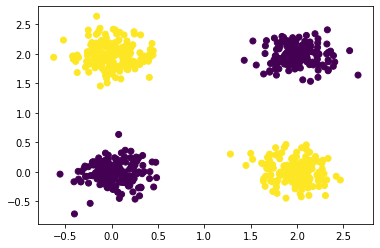

In [ ]:
plt.scatter(X_train[0,:], X_train[1,:], c=Y_train[0,:])
plt.show()

In [ ]:
h0, h1, h2 = 2, 10, 1

def init_params():
  W1 = np.random.randn(h1, h0)
  W2 = np.random.randn(h2, h1)
  b1 = np.random.randn(h1, 1)
  b2 = np.random.randn(h2, 1)
  return W1, W2, b1, b2

(array([[0.83405043, 0.57510771, 0.40001565, ..., 0.29009341, 0.02031285,
         0.23877359],
        [0.17925108, 0.28852939, 0.28491682, ..., 0.27235668, 0.89074784,
         0.32581027],
        [0.86898162, 0.27859694, 0.31398024, ..., 0.66073537, 0.90816456,
         0.57463791],
        ...,
        [0.61108209, 0.16367152, 0.06883693, ..., 0.6292516 , 0.57821447,
         0.22571454],
        [0.52885647, 0.60589966, 0.38786936, ..., 0.07874342, 0.05424908,
         0.40719266],
        [0.83150893, 0.89700517, 0.53114165, ..., 0.5083241 , 0.08675754,
         0.67101727]]),
 array([[0.2222109 , 0.44059933, 0.31258767, 0.35576059, 0.14409261,
         0.72625757, 0.26231219, 0.33101857, 0.49524227, 0.09364988]]),
 array([[0.95517995],
        [0.70891382],
        [0.54890362],
        [0.99906394],
        [0.08578594],
        [0.6764476 ],
        [0.03228305],
        [0.87128571],
        [0.85843756],
        [0.13776019]]),
 array([[0.96215432]]))

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
  
def d_sigmoid(z):
  return  sigmoid(z)* (1- sigmoid(z)) 

In [ ]:
def loss(y_pred, Y):
  n = Y.shape[1]
  return  - np.sum(Y*np.log(y_pred) + (1-Y)* np.log(1-y_pred))/n

In [ ]:
def forward_pass(X, W1,W2, b1, b2):
  Z1 = W1.dot(X) + b1
  A1 = sigmoid(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = sigmoid(Z2)
  return A2, Z2, A1, Z1


In [ ]:
def accuracy(y_pred, y):
  return (y_pred == y).sum()/y_pred.shape[1]
def predict(X,W1,W2, b1, b2):
  A2, Z2, A1, Z1 = forward_pass(X, W1,W2, b1, b2)
  A2[A2>=0.5] = 1
  A2[A2<0.5] = 0
  return A2

In [ ]:
def backward_pass(X,Y, A2, Z2, A1, Z1, W1, W2, b1, b2):
  n = X.shape[1]
  dZ2 = A2 -Y
  #print ("dZ2 : ", dZ2.shape)
  dW2 = dZ2.dot(A1.T)/n
  #print ("dW2 : ", dW2.shape)
  db2 = (np.sum(dZ2, axis= 1)/n).reshape(-1,1)
  #print ("db2 : ", db2.shape)
  dZ1 = W2.T.dot(dZ2) * d_sigmoid(Z1)
  #print ("dZ1 : ", dZ1.shape)
  dW1 = dZ1.dot(X.T)/n
  #print ("dW1 : ", dW1.shape)
  
  db1 = (np.sum(dZ1, axis =1)/n).reshape(-1,1)
  #print ("db1 : ", db1.shape)
  assert db1.shape == b1.shape
  assert db2.shape == b2.shape
  return dW1, dW2, db1, db2

In [ ]:
def plot_decision_boundary(W1, W2, b1, b2):
  x = np.linspace(-0.5, 2.5,100 )
  y = np.linspace(-0.5, 2.5,100 )
  xv , yv = np.meshgrid(x,y)
  xv.shape , yv.shape
  X_ = np.stack([xv,yv],axis = 0)
  X_ = X_.reshape(2,-1)
  A2, Z2, A1, Z1 = forward_pass(X_, W1, W2, b1, b2)
  plt.figure()
  plt.scatter(X_[0,:], X_[1,:], c= A2)
  plt.show()

In [ ]:
def update(W1, W2, b1, b2,dW1, dW2, db1, db2, alpha ):
  W1 = W1 - alpha * dW1
  W2 = W2 - alpha * dW2
  b1 = b1 - alpha * db1
  b2 = b2 - alpha * db2
  return W1, W2, b1, b2

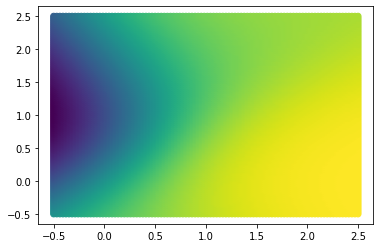

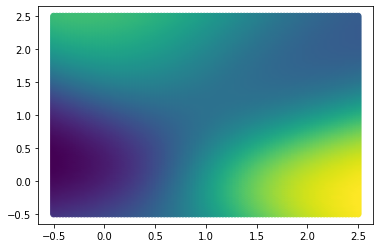

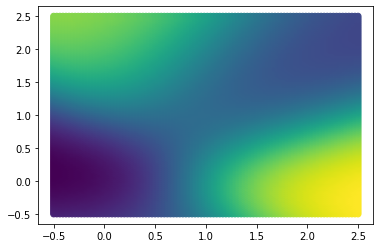

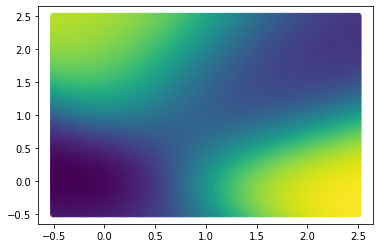

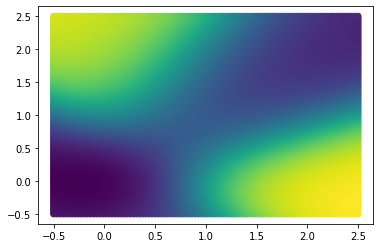

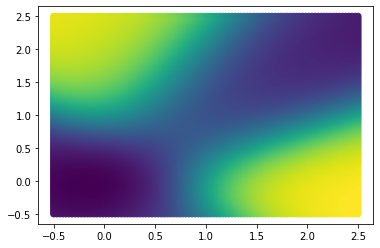

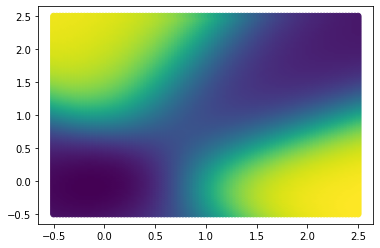

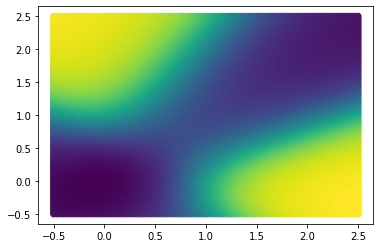

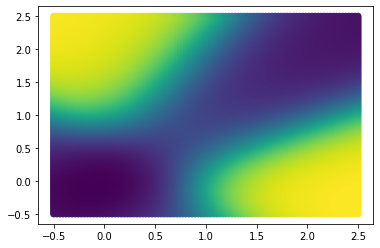

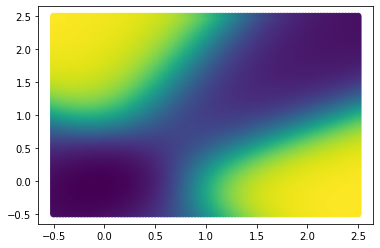

train accuracy : 1.0
test accuracy : 1.0


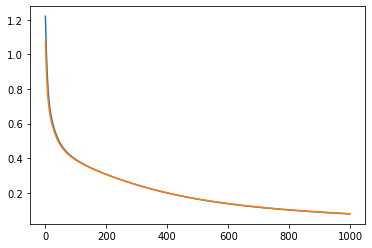

In [ ]:
alpha = 0.1
W1, W2, b1, b2 = init_params()
n_epochs = 1000
train_loss = []
test_loss = []
for i in range(n_epochs):
  A2, Z2, A1, Z1 = forward_pass(X_train, W1, W2, b1, b2)
  dW1, dW2, db1, db2 = backward_pass(X_train,Y_train, A2, Z2, A1, Z1, W1, W2, b1, b2)
  W1, W2, b1, b2 = update(W1, W2, b1, b2,dW1, dW2, db1, db2, alpha)
  train_loss.append(loss(A2, Y_train))
  A2, Z2, A1, Z1 = forward_pass(X_test, W1, W2, b1, b2)
  test_loss.append(loss(A2, Y_test))
  if i %100 == 0:
    plot_decision_boundary(W1, W2, b1, b2)
plt.plot(train_loss)
plt.plot(test_loss)

y_pred = predict(X_train, W1, W2, b1, b2)
train_accuracy = accuracy(y_pred, Y_train)
print ("train accuracy :", train_accuracy)

y_pred = predict(X_test, W1, W2, b1, b2)
test_accuracy = accuracy(y_pred, Y_test)
print ("test accuracy :", test_accuracy)